In [1]:
import numpy as np
import keras 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\Admin\AppData\Local\Continuum\anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\AppData\Local\Continuum\anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\AppData\Local\Continuum\anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin

In [2]:
from keras.models import load_model

In [3]:
model = load_model('model_final.h5')

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total params: 40,932,676
Trainable params: 33,297,412
Non-trainable params: 7,635,264
__________________________________

In [5]:
from keras import models
from keras import layers
from keras import optimizers

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
img3 = cv2.imread('Dataset/train/MildDemented/mildDem0.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])

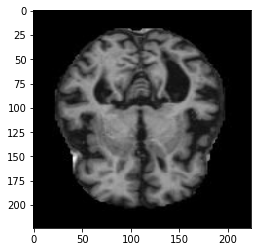

In [14]:
plt.imshow(img3)
plt.show()

In [15]:
disease = model.predict_classes(img4)
prediction = disease[0]
print(prediction)

3


In [16]:
mapping = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [17]:
prediction_name = mapping[prediction]
prediction_name

'VeryMildDemented'